## CA1 FOOTBALL SCORE PREDICTION MACHINE LEARNING

### DATASET CLEANING

In this section, the dataset is loaded and preprocessed to ensure it is ready for machine learning. This includes ensuring that every football match is a World Cup Qualifier, in such a way that no match takes place on a neutral field.

---

In [338]:
import pandas as pd

df = pd.read_csv('all_matches.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False
...,...,...,...,...,...,...,...,...
49969,2024-10-15,Costa Rica,Guatemala,3,0,CONCACAF Nations League A,Costa Rica,False
49970,2024-10-15,Brazil,Peru,4,0,World Cup qualifier,Brazil,False
49971,2024-10-15,Mexico,United States,2,0,Friendly,Mexico,False
49972,2024-10-15,Canada,Panama,2,1,Friendly,Canada,False


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49974 entries, 0 to 49973
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        49974 non-null  object
 1   home_team   49974 non-null  object
 2   away_team   49974 non-null  object
 3   home_score  49974 non-null  int64 
 4   away_score  49974 non-null  int64 
 5   tournament  49974 non-null  object
 6   country     49974 non-null  object
 7   neutral     49974 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 2.7+ MB


In [340]:
#selecting only World Cup Qualifier Tournament
world_cup_qualifiers = df[df['tournament'].str.contains("World Cup Qualifier", case=False, na=False)]
#dropping every column that represent Neutral field as True
world_cup_qualifiers = world_cup_qualifiers[world_cup_qualifiers['neutral'] == False]

#reseting the index
world_cup_qualifiers.reset_index(drop=True, inplace=True)
world_cup_qualifiers.index += 1

world_cup_qualifiers['date'] = pd.to_datetime(world_cup_qualifiers['date'], errors='coerce')

world_cup_qualifiers

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
1,1933-06-11,Sweden,Estonia,6,2,World Cup qualifier,Sweden,False
2,1933-06-29,Lithuania,Sweden,0,2,World Cup qualifier,Lithuania,False
3,1933-09-24,Yugoslavia,Switzerland,2,2,World Cup qualifier,Yugoslavia,False
4,1933-10-15,Poland,Czechoslovakia,1,2,World Cup qualifier,Poland,False
5,1933-10-29,Switzerland,Romania,2,2,World Cup qualifier,Switzerland,False
...,...,...,...,...,...,...,...,...
6812,2024-10-15,Japan,Australia,1,1,World Cup qualifier,Japan,False
6813,2024-10-15,China,Indonesia,2,1,World Cup qualifier,China,False
6814,2024-10-15,Colombia,Chile,4,0,World Cup qualifier,Colombia,False
6815,2024-10-15,Brazil,Peru,4,0,World Cup qualifier,Brazil,False


In [341]:
world_cup_qualifiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 1 to 6816
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6816 non-null   datetime64[ns]
 1   home_team   6816 non-null   object        
 2   away_team   6816 non-null   object        
 3   home_score  6816 non-null   int64         
 4   away_score  6816 non-null   int64         
 5   tournament  6816 non-null   object        
 6   country     6816 non-null   object        
 7   neutral     6816 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 379.5+ KB


In [342]:
#creating a new column on our dataset showing the goal difference for each match.
#this new column is gonna work as our target variable
world_cup_qualifiers['goal_difference'] = world_cup_qualifiers['home_score'] - world_cup_qualifiers['away_score']
world_cup_qualifiers

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,goal_difference
1,1933-06-11,Sweden,Estonia,6,2,World Cup qualifier,Sweden,False,4
2,1933-06-29,Lithuania,Sweden,0,2,World Cup qualifier,Lithuania,False,-2
3,1933-09-24,Yugoslavia,Switzerland,2,2,World Cup qualifier,Yugoslavia,False,0
4,1933-10-15,Poland,Czechoslovakia,1,2,World Cup qualifier,Poland,False,-1
5,1933-10-29,Switzerland,Romania,2,2,World Cup qualifier,Switzerland,False,0
...,...,...,...,...,...,...,...,...,...
6812,2024-10-15,Japan,Australia,1,1,World Cup qualifier,Japan,False,0
6813,2024-10-15,China,Indonesia,2,1,World Cup qualifier,China,False,1
6814,2024-10-15,Colombia,Chile,4,0,World Cup qualifier,Colombia,False,4
6815,2024-10-15,Brazil,Peru,4,0,World Cup qualifier,Brazil,False,4


In [343]:
import numpy as np

#getting the rolling averages for each team for Home and Away matches
def calculate_averages(df, team_name, current_date, last_n_matches=10):
    past_home_games_df = df[(df['home_team'] == team_name) & (df['date'] < current_date)].sort_values('date')
    past_away_games_df = df[(df['away_team'] == team_name) & (df['date'] < current_date)].sort_values('date')

    home_scored_avg = past_home_games_df['home_score'].tail(last_n_matches).mean() if len(past_home_games_df) >= last_n_matches else np.nan
    home_conceded_avg = past_home_games_df['away_score'].tail(last_n_matches).mean() if len(past_home_games_df) >= last_n_matches else np.nan
    
    away_scored_avg = past_away_games_df['away_score'].tail(last_n_matches).mean() if len(past_away_games_df) >= last_n_matches else np.nan
    away_conceded_avg = past_away_games_df['home_score'].tail(last_n_matches).mean() if len(past_away_games_df) >= last_n_matches else np.nan
    
    return home_scored_avg, home_conceded_avg, away_scored_avg, away_conceded_avg

In [344]:
#helper method to check if the last 10 matches is being collected
def display_last_10_matches(df, team_name, current_date, last_n_matches=10):
    past_home_games = df[(df['home_team'] == team_name) & (df['date'] < current_date)].sort_values('date')
    past_away_games = df[(df['away_team'] == team_name) & (df['date'] < current_date)].sort_values('date')
    
    print(f"Last {last_n_matches} home games for {team_name} up to {current_date}:")
    print(past_home_games[['date', 'home_team', 'away_team', 'home_score', 'away_score']].tail(last_n_matches))
    
    print(f"\nLast {last_n_matches} away games for {team_name} up to {current_date}:")
    print(past_away_games[['date', 'home_team', 'away_team', 'home_score', 'away_score']].tail(last_n_matches))


In [345]:
#example usage
team_name = 'Brazil'
current_date = '2024-11-13'

current_date = pd.to_datetime(current_date)

display_last_10_matches(world_cup_qualifiers, team_name, current_date, last_n_matches=10)

Last 10 home games for Brazil up to 2024-11-13 00:00:00:
           date home_team  away_team  home_score  away_score
6338 2021-09-09    Brazil       Peru           2           0
6449 2021-10-14    Brazil    Uruguay           4           1
6466 2021-11-11    Brazil   Colombia           1           0
6585 2022-02-01    Brazil   Paraguay           4           0
6600 2022-03-24    Brazil      Chile           4           0
6644 2023-09-08    Brazil    Bolivia           5           1
6653 2023-10-12    Brazil  Venezuela           1           1
6696 2023-11-21    Brazil  Argentina           0           1
6775 2024-09-06    Brazil    Ecuador           1           0
6815 2024-10-15    Brazil       Peru           4           0

Last 10 away games for Brazil up to 2024-11-13 00:00:00:
           date  home_team away_team  home_score  away_score
6357 2021-10-07  Venezuela    Brazil           1           3
6406 2021-10-10   Colombia    Brazil           0           0
6547 2021-11-16  Argentina    B

In [346]:
#applying the avg to each row for Home and Away teams
def get_home_rolling_averages(row):
    home_team = row['home_team']
    current_date = row['date']
    home_scored_avg, home_conceded_avg, _, _ = calculate_averages(world_cup_qualifiers, home_team, current_date)
    return pd.Series([home_scored_avg, home_conceded_avg])

def get_away_rolling_averages(row):
    away_team = row['away_team']
    current_date = row['date']
    _, _, away_scored_avg, away_conceded_avg = calculate_averages(world_cup_qualifiers, away_team, current_date)
    return pd.Series([away_scored_avg, away_conceded_avg])

In [347]:
world_cup_qualifiers[['home_scored_avg', 'home_conceded_avg']] = world_cup_qualifiers.apply(get_home_rolling_averages, axis=1)
world_cup_qualifiers[['away_scored_avg', 'away_conceded_avg']] = world_cup_qualifiers.apply(get_away_rolling_averages, axis=1)

world_cup_qualifiers = world_cup_qualifiers.dropna()

world_cup_qualifiers

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,goal_difference,home_scored_avg,home_conceded_avg,away_scored_avg,away_conceded_avg
368,1965-09-19,Luxembourg,Yugoslavia,2,5,World Cup qualifier,Luxembourg,False,-3,1.0,3.7,1.3,1.3
403,1968-06-19,Finland,Belgium,1,2,World Cup qualifier,Finland,False,-1,1.1,2.9,2.8,2.5
408,1968-10-09,Belgium,Finland,6,1,World Cup qualifier,Belgium,False,5,2.3,1.6,0.8,4.4
413,1968-10-16,Belgium,Yugoslavia,3,0,World Cup qualifier,Belgium,False,3,2.7,1.3,1.3,1.0
426,1968-11-06,France,Norway,0,1,World Cup qualifier,France,False,-1,3.8,0.6,0.7,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,2024-10-15,Japan,Australia,1,1,World Cup qualifier,Japan,False,0,2.4,0.5,0.9,1.1
6813,2024-10-15,China,Indonesia,2,1,World Cup qualifier,China,False,1,1.5,0.8,0.7,3.6
6814,2024-10-15,Colombia,Chile,4,0,World Cup qualifier,Colombia,False,4,1.3,0.6,0.6,2.1
6815,2024-10-15,Brazil,Peru,4,0,World Cup qualifier,Brazil,False,4,2.4,0.4,0.3,1.1


### ML MODELS

Before moving on to the models themselves, this section focuses on splitting the dataset into subsets that will be used for training and evaluating the models.

---

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#summary
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.base.model import Model

#plot tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#defining the features X
#defining the target variable Y
X = world_cup_qualifiers[['home_scored_avg', 'home_conceded_avg', 'away_scored_avg', 'away_conceded_avg']]
y = world_cup_qualifiers['goal_difference']

#getting the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Gradient Boosting Regressor
---

In [351]:
#initializing Gradient Boosing Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

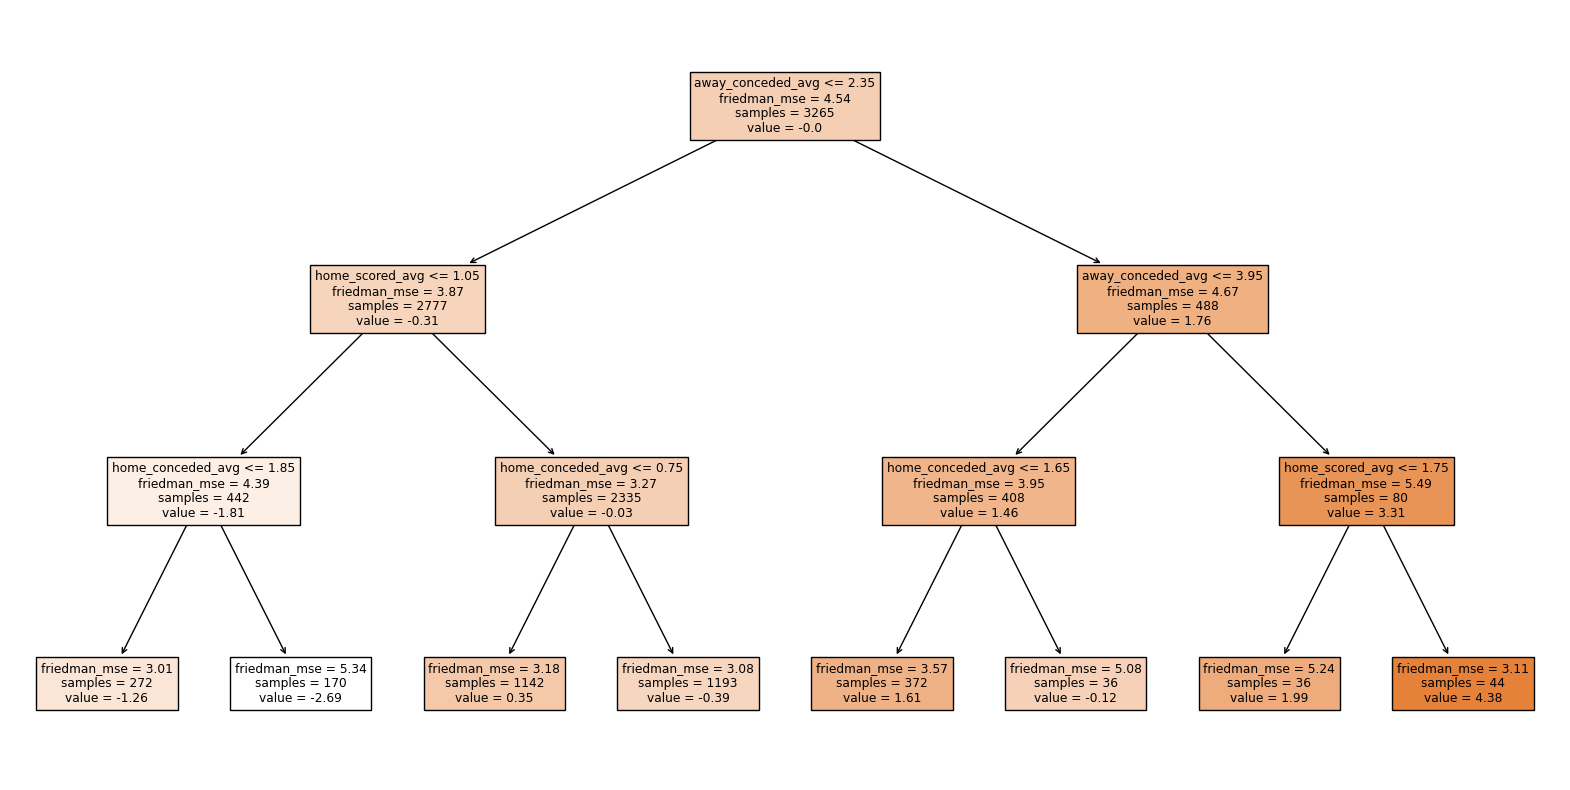

In [404]:
# Visualize a single tree in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(gb_model.estimators_[0, 0], filled=True, feature_names=X.columns, precision=2)
plt.show()

In [353]:
#making predictions and evaluating the models
gb_predictions = gb_model.predict(X_test)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

"Gradient Boosting Regressor Performance:", f"Mean Absolute Error: {gb_mae:.2f}", f"Mean Squared Error: {gb_mse:.2f}"

('Gradient Boosting Regressor Performance:',
 'Mean Absolute Error: 1.33',
 'Mean Squared Error: 3.05')

### Linear Regression
---

In [355]:
#initializing Linear Regression
lr_model = LinearRegression()
lr_model = sm.OLS(y, X).fit()

In [356]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        goal_difference   R-squared (uncentered):                   0.389
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              648.7
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                        0.00
Time:                        14:08:01   Log-Likelihood:                         -8029.8
No. Observations:                4082   AIC:                                  1.607e+04
Df Residuals:                    4078   BIC:                                  1.609e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
home_scored_avg       0.4002      0.030     13.322      0.000       0.341       0.459
home_conceded_avg    -0.9424      0.043    -21.825      0.000      -1.027      -0.858
away_scored_avg      -0.5189      0.047    -11.076      0.000      -0.611      -0.427
away_conceded_avg     0.8408      0.030     28.426      0.000       0.783       0.899
==============================================================================
Omnibus:                      123.236   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.470
Skew:                           0.183   Prob(JB):                     4.54e-57
Kurtosis:                       4.180   Cond. No.                         6.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
lr_model.resid

368    -0.331835
403     0.643512
408     2.302820
413     2.978204
426    -4.198778
          ...   
6812   -0.947285
6813   -1.510159
6814    2.590744
6815    2.647160
6816    3.336970
Length: 4082, dtype: float64

In [358]:
lr_model.resid.describe()

count    4082.000000
mean       -0.005999
std         1.730298
min        -7.545159
25%        -1.060032
50%        -0.040634
75%         0.995097
max         8.492213
dtype: float64

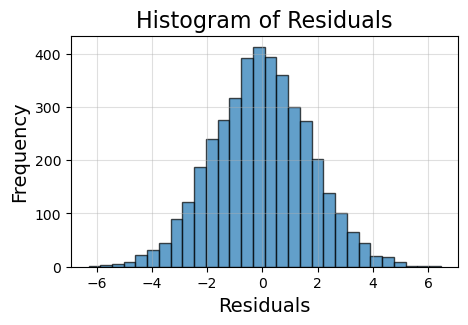

In [400]:
#creating the histogram plot
describe_output = lr_model.resid.describe()

mean = describe_output["mean"]
std = describe_output["std"]
min_val = describe_output["min"]
max_val = describe_output["max"]
count = int(describe_output["count"])

# Simulate the residuals based on mean and std
residuals = np.random.normal(loc=mean, scale=std, size=count)

# Clip the simulated residuals to match the min and max
residuals = np.clip(residuals, min_val, max_val)

plt.figure(figsize=(5, 3))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

In [359]:
#making predictions and evaluating the models
lr_predictions = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

"Linear Regression Model Performance:", f"Mean Absolute Error: {lr_mae:.2f}", f"Mean Squared Error: {lr_mse:.2f}"

('Linear Regression Model Performance:',
 'Mean Absolute Error: 1.31',
 'Mean Squared Error: 2.94')

### Random Forest Regressor
---

In [361]:
#initializing Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

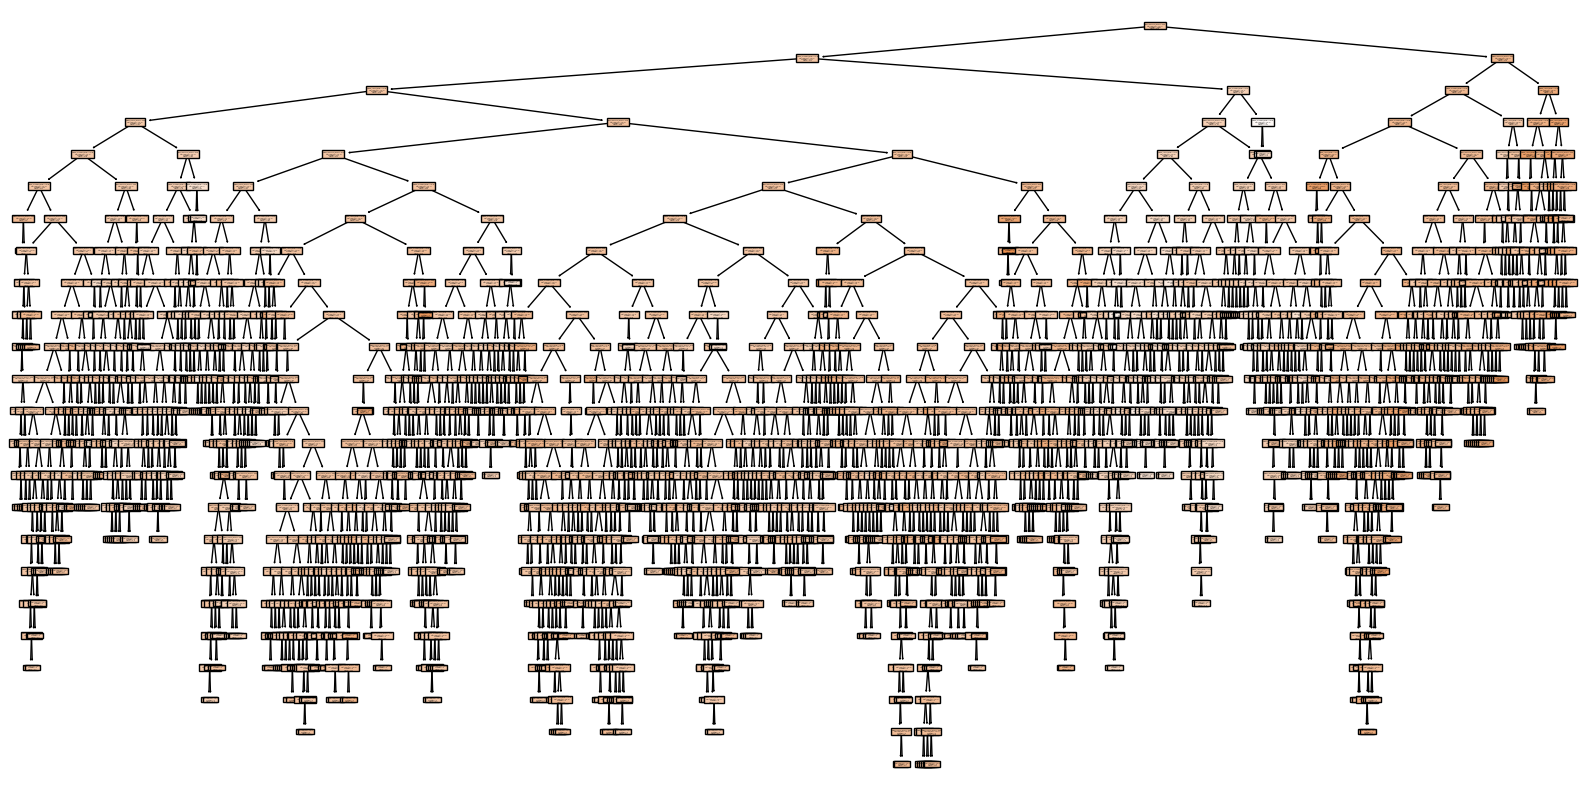

In [362]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, precision=2)
plt.show()

In [363]:
#making predictions and evaluating the models
rf_predictions = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

"Random Forest Regressor Performance:", f"Mean Absolute Error: {rf_mae:.2f}", f"Mean Squared Error: {rf_mse:.2f}"

('Random Forest Regressor Performance:',
 'Mean Absolute Error: 1.43',
 'Mean Squared Error: 3.47')

## Making Match Predictions: Predicting Goal Differences

---

## 1. Extracting Historical Data for the Home Team and Away Team

Retrieves the latest match data for each team (rolling averages of goals scored and conceded).

---

In [366]:
#testing the Score Prediction
home_team = 'Brazil'
away_team = 'Argentina'
possible_match_date = pd.to_datetime('2025-06-01')

In [367]:
#getting the latest row before the match date (so we can collect the avg)
home_team_data = world_cup_qualifiers[
    (world_cup_qualifiers['home_team'] == home_team) & (world_cup_qualifiers['date'] < possible_match_date)
].sort_values(by='date').iloc[-1]  

#again, getting the latest pre-calculated rolling averages for the away team
away_team_data = world_cup_qualifiers[
    (world_cup_qualifiers['away_team'] == away_team) & (world_cup_qualifiers['date'] < possible_match_date)
].sort_values(by='date').iloc[-1]  # Get the latest row before the match date

home_team_data, "-----------------------------------------------------", away_team_data

(date                 2024-10-15 00:00:00
 home_team                         Brazil
 away_team                           Peru
 home_score                             4
 away_score                             0
 tournament           World Cup qualifier
 country                           Brazil
 neutral                            False
 goal_difference                        4
 home_scored_avg                      2.4
 home_conceded_avg                    0.4
 away_scored_avg                      0.3
 away_conceded_avg                    1.1
 Name: 6815, dtype: object,
 '-----------------------------------------------------',
 date                 2024-10-10 00:00:00
 home_team                      Venezuela
 away_team                      Argentina
 home_score                             1
 away_score                             1
 tournament           World Cup qualifier
 country                        Venezuela
 neutral                            False
 goal_difference                

## 2. Creating a Feature Set for Prediction:

Combines the rolling averages (home_scored_avg, home_conceded_avg, etc.) from the filtered data into a new DataFrame called features.

---

In [369]:
features = pd.DataFrame([[
    home_team_data['home_scored_avg'],
    home_team_data['home_conceded_avg'],
    away_team_data['away_scored_avg'],
    away_team_data['away_conceded_avg']
]], columns=['home_scored_avg', 'home_conceded_avg', 'away_scored_avg', 'away_conceded_avg'])

## 3. Making Predictions

---

In [371]:
#making the predictions with the trained models
gb_prediction = gb_model.predict(features)[0]
lr_prediction = lr_model.predict(features)[0]
rf_prediction = rf_model.predict(features)[0]

f"Gradient Boosting Prediction (Goal Difference) for {home_team} vs {away_team}: {gb_prediction:.2f}", f"Linear Regression Prediction (Goal Difference) for {home_team} vs {away_team}: {lr_prediction:.2f}", f"Random Forest Prediction (Goal Difference) for {home_team} vs {away_team}: {rf_prediction:.2f}"

('Gradient Boosting Prediction (Goal Difference) for Brazil vs Argentina: 0.42',
 'Linear Regression Prediction (Goal Difference) for Brazil vs Argentina: 0.34',
 'Random Forest Prediction (Goal Difference) for Brazil vs Argentina: -0.00')